In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('assets/wave_height_hourly.csv')

In [3]:
data.head()

,time,SignificantWaveHeight
0,2016-01-01 00:00:00,6.085000
1,2016-01-01 01:00:00,5.989611
2,2016-01-01 02:00:00,5.494222
3,2016-01-01 03:00:00,5.170778
4,2016-01-01 04:00:00,5.362333


In [4]:
wave = pd.Series(data['SignificantWaveHeight'].values, index = pd.to_datetime(data['time']))

In [5]:
from src.tde import UnivariateTDE

In [6]:
wave_tde = UnivariateTDE(wave, horizon=6, k=6)
wave_tde.head()

,t-5,t-4,t-3,t-2,t-1,t-0,t+1,t+2,t+3,t+4,t+5,t+6
0,6.085000,5.989611,5.494222,5.170778,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167,5.418722,5.306167
1,5.989611,5.494222,5.170778,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167,5.418722,5.306167,5.193222
2,5.494222,5.170778,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167,5.418722,5.306167,5.193222,5.798111
3,5.170778,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167,5.418722,5.306167,5.193222,5.798111,4.452444
4,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167,5.418722,5.306167,5.193222,5.798111,4.452444,4.506556


In [7]:
is_future = wave_tde.columns.str.contains('\+')
X = wave_tde.iloc[:,~is_future]
y = wave_tde['t+6']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [10]:
X_train.head()

,t-5,t-4,t-3,t-2,t-1,t-0
0,6.085000,5.989611,5.494222,5.170778,5.362333,4.876556
1,5.989611,5.494222,5.170778,5.362333,4.876556,5.110222
2,5.494222,5.170778,5.362333,4.876556,5.110222,4.856111
3,5.170778,5.362333,4.876556,5.110222,4.856111,5.071167
4,5.362333,4.876556,5.110222,4.856111,5.071167,4.984167


In [11]:
y_train.head()

0    5.306167
1    5.193222
2    5.798111
3    4.452444
4    4.506556
Name: t+6, dtype: float64

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [13]:
model = Ridge()
model.fit(X_train, y_train)

Ridge()

In [14]:
forecasts = model.predict(X_test)
forecasts

array([5.44728269, 5.60579269, 5.47630491, ..., 2.13982708, 2.14912856,
       2.18913029])

In [15]:
test_data = pd.DataFrame({'forecasts': forecasts, 'actual': y_test})
test_data.head()

,forecasts,actual
18345,5.447283,5.540222
18346,5.605793,5.203722
18347,5.476305,5.038833
18348,6.118067,5.252444
18349,5.665701,5.517056


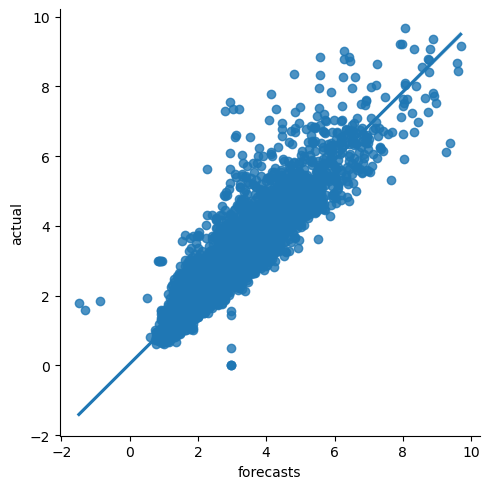

In [16]:
import seaborn as sns
sns.lmplot(x='forecasts', y='actual',data=test_data,fit_reg=True) 

In [17]:
from sklearn.metrics import mean_absolute_error, r2_score
from src.error import MASE

In [18]:
# MASE(y_train, y_test, forecasts)
mean_absolute_error(y_test, forecasts)

0.3361998453948207

In [19]:
large_y_test = y_test[y_test > 5]
large_forecasts = forecasts[y_test > 5]
mean_absolute_error(large_y_test, large_forecasts)

0.9090665247163432

In [20]:
r2_score(y_test, forecasts)

0.855926023954011

In [21]:
r2_score(large_y_test, large_forecasts)

-0.5545428784168429